# Μέρος 1 - Λογιστική Παλινδρόμηση




# Εισαγωγή βιβλιοθηκών

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Φόρτωση δεδομένων

In [ ]:
df = pd.read_csv('diabetes.csv')

# Εμφάνιση των πρώτων 5 γραμμών του DataFrame

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Στατιστική περιγραφή

In [ ]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

# Δημιουργία ιστογραμμάτων για κάθε χαρακτηριστικό

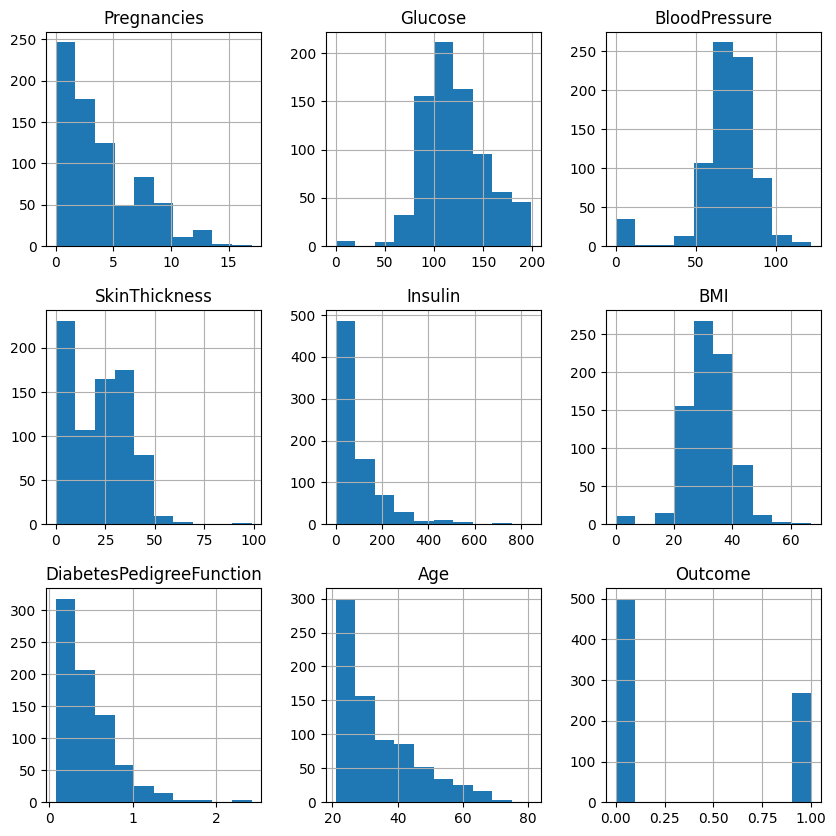

In [ ]:
df.hist(figsize=(10, 10))
plt.show()

# Ραβδόγραμμα για το Outcome

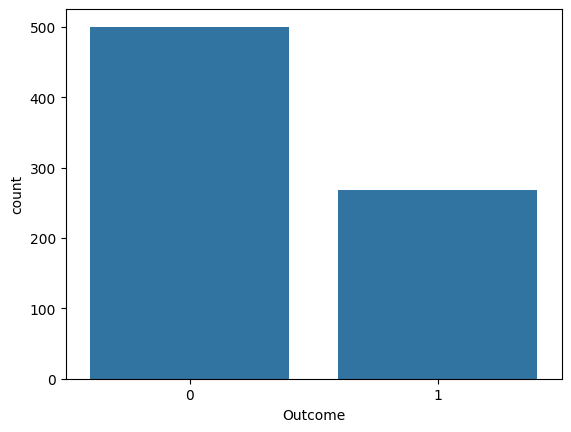

In [ ]:
sns.countplot(x='Outcome', data=df)
plt.show()

# Αξιολόγηση ποιότητας δεδομένων

Στα χαρακτηριστικά Glucose, BloodPressure, SkinThickness, Insulin, και BMI, παρατηρούνται μηδενικές τιμές, κάτι που δεν είναι φύσικο για αυτά τα ιατρικά δεδομένα. Για παράδειγμα, ένας ασθενής δεν μπορεί να έχει μηδενική συγκέντρωση γλυκόζης ή πίεση αίματος. Αυτό υποδεικνύει είτε λανθασμένα καταγεγραμμένα δεδομένα είτε ελλείψεις στις μετρήσεις. Οι μηδενικές τιμές μπορεί να οδηγήσουν σε λανθασμένα συμπεράσματα κατά την εκπαίδευση του μοντέλου, οπότε χρειάζονται προεπεξεργασία ή αντικατάσταση με κατάλληλες τιμές (π.χ., μέσω μέσης τιμής ή παρεμβολής).

Η κατανομή των τιμών σε πολλά χαρακτηριστικά δεν είναι ισορροπημένη, όπως φαίνεται και από τα ιστογράμματα. Συγκεκριμένα, οι τιμές για το Outcome (0: Αρνητικός,1: Θετικός) δεν είναι ισότιμα κατανεμημένες, καθώς οι περισσότερες εγγραφές δείχνουν ότι οι ασθενείς δεν έχουν διαβήτη. Αυτό το ζήτημα μπορεί να επηρεάσει την απόδοση του ταξινομητή, αφού το μοντέλο μπορεί να τείνει να προβλέπει την κατηγορία με τα περισσότερα παραδείγματα (no diabetes), κάτι που δημιουργεί προβλήματα στην απόδοση του μοντέλου, ειδικά για την κατηγορία που περιλαμβάνει διαβητικούς.

Η ποιότητα των δεδομένων θεωρείται μέτρια προς κακή, καθώς οι μηδενικές τιμές και η ανισορροπία στις κατηγορίες μπορεί να οδηγήσουν σε προβλήματα κατά την εκπαίδευση του μοντέλου. Θα χρειαστούν τεχνικές προεπεξεργασίας όπως η αντιμετώπιση των μηδενικών τιμών και ενδεχομένως η αναπροσαρμογή του συνόλου δεδομένων για να βελτιωθεί η ισορροπία μεταξύ των κατηγοριών.

# Κατανομή της ηλικίας (Age)

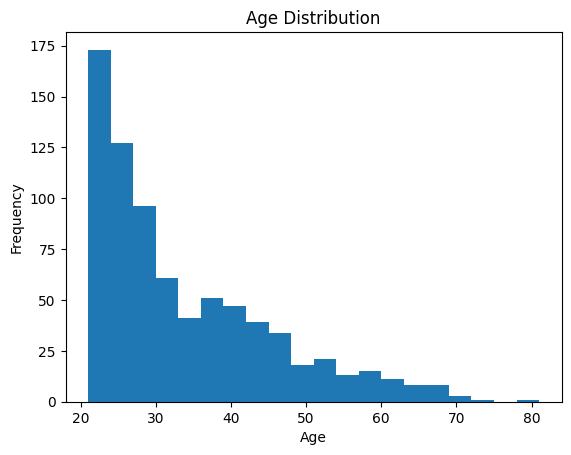

In [ ]:
plt.hist(df['Age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Ερμηνεία της κατανομής και αξιολόγηση

Η μεταβλητή Age φαίνεται να έχει μια κατανομή που τείνει να είναι δεξιόστροφα ασύμμετρη (right-skewed), με τους περισσότερους ασθενείς να είναι νεότεροι. Η πλειοψηφία των ασθενών βρίσκεται στο ηλικιακό εύρος των 20-40 ετών, ενώ λιγότεροι είναι οι ασθενείς που ανήκουν σε μεγαλύτερες ηλικίες (πάνω από 50 χρόνια).

 Η κατανομή της ηλικίας δεν είναι ιδανική για την κατασκευή της εφαρμογής, καθώς υπάρχει ασυμμετρία με υπερεκπροσώπηση νεότερων ηλικιών και λιγότερα δεδομένα για μεγαλύτερες ηλικίες. Αυτό μπορεί να δημιουργήσει δυσκολίες στην ακρίβεια των προβλέψεων για ασθενείς μεγαλύτερης ηλικίας, που είναι και η ομάδα που μπορεί να διατρέχει μεγαλύτερο κίνδυνο για διαβήτη. Η ισορροπημένη εκπροσώπηση των ηλικιακών ομάδων είναι σημαντική για την κατασκευή ενός γενικευμένου μοντέλου που μπορεί να κάνει αξιόπιστες προβλέψεις για όλους τους χρήστες της εφαρμογής.

# Σχέση γλυκόζης και διαβήτη

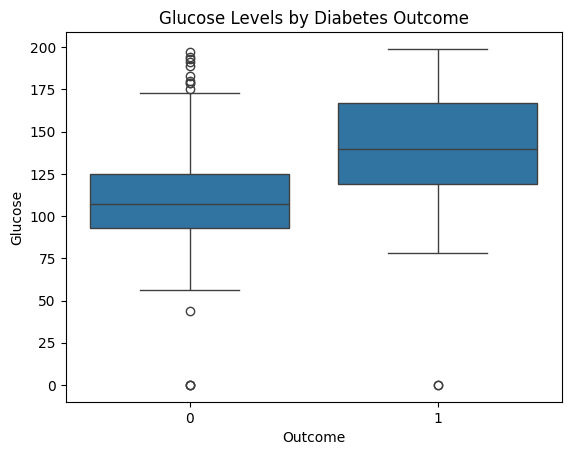

In [ ]:
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Glucose Levels by Diabetes Outcome')
plt.show()

# Υπολογισμός της μέσης τιμής της γλυκόζης για τις δύο κατηγορίες

In [ ]:
mean_glucose_diabetes = df.groupby('Outcome')['Glucose'].mean()
print(mean_glucose_diabetes)

Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64


# Τελικό Συμπέρασμα

Η οπτική απεικόνιση με το box plot, σε συνδυασμό με τη στατιστική περιγραφή των μέσων τιμών, δείχνει ξεκάθαρα ότι οι ασθενείς με διαβήτη έχουν υψηλότερα επίπεδα γλυκόζης. Με αυτόν τον τρόπο, τα δεδομένα επιβεβαιώνουν τη σχέση μεταξύ υψηλών επιπέδων γλυκόζης και της πιθανότητας εμφάνισης διαβήτη.

# Δημιουργία Numpy Arrays

In [ ]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values


# Χωρισμός σε train και test set (70-30%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Εμφάνιση του πλήθους των παραδειγμάτων

In [ ]:
print(f"Training examples: {len(X_train)}")
print(f"Validation examples: {len(X_test)}")

Training examples: 537
Validation examples: 231


# Εκπαίδευση Logistic Regression

In [ ]:
model = LogisticRegression(random_state=0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

# Πρόβλεψη στο test set

In [ ]:
y_pred = model.predict(X_test)


# Υπολογισμός ακρίβειας

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7792207792207793


# Αξιολόγηση λανθασμένων προβλέψεων

Στην περίπτωση που το μοντέλο προβλέπει ότι ένας ασθενής έχει διαβήτη, ενώ στην πραγματικότητα δεν έχει. Το σφάλμα αυτό μπορεί να προκαλέσει άγχος στον ασθενή και να οδηγήσει σε επιπλέον εξετάσεις που δεν είναι απαραίτητες. Παρόλο που η κατάσταση αυτή μπορεί να είναι ενοχλητική για τον ασθενή, δεν αποτελεί σοβαρό κίνδυνο για την υγεία του, καθώς οι επιπλέον εξετάσεις μπορούν να επιβεβαιώσουν ότι δεν υπάρχει πραγματικό πρόβλημα.



Στην περίπτωση που το μοντέλο προβλέπει ότι ένας ασθενής δεν έχει διαβήτη, ενώ στην πραγματικότητα έχει. Αυτή η περίπτωση είναι πιο σοβαρή, καθώς ο ασθενής δεν θα λάβει την κατάλληλη ιατρική φροντίδα και θεραπεία. Ο διαβήτης είναι μια πάθηση που αν δεν διαγνωστεί και δεν αντιμετωπιστεί έγκαιρα, μπορεί να οδηγήσει σε σοβαρές επιπλοκές όπως καρδιαγγειακά νοσήματα, νεφρική ανεπάρκεια και νευρική βλάβη.

Συμπερασματικά είναι πιο σημαντικό να εντοπίζουμε όλους τους πιθανούς ασθενείς με διαβήτη, ακόμα και αν αυτό σημαίνει μερικά ψευδώς θετικά αποτελέσματα, ώστε να αποφύγουμε τον κίνδυνο σοβαρών επιπλοκών που προκαλούνται από τη μη διάγνωση του διαβήτη.

# Δημιουργία ομάδων ηλικίας

In [ ]:
age_groups = pd.cut(df['Age'], bins=[0, 25, 50, 100], labels=['0-25', '25-50', '>50'])

# Προσθήκη της ομάδας ηλικίας στα δεδομένα

In [ ]:
df['AgeGroup'] = age_groups

# Υπολογισμός ακρίβειας ανά ηλικιακή ομάδα

In [ ]:
accuracy_per_age = df.groupby('AgeGroup', observed=True)['Outcome'].mean()


# Ραβδόγραμμα για την ακρίβεια ανά ηλικία

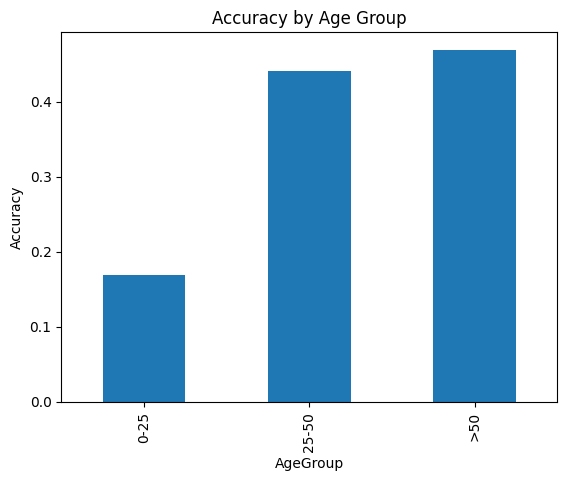

In [ ]:
accuracy_per_age.plot(kind='bar')
plt.title('Accuracy by Age Group')
plt.ylabel('Accuracy')
plt.show()

# Τακτικές Regularization (L1, L2, Elastic Net)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

penalties = ['l1', 'l2', 'elasticnet']
accuracies = []

for penalty in penalties:
    if penalty == 'elasticnet':
        model = LogisticRegression(penalty=penalty, solver='saga', l1_ratio=0.5, random_state=0, max_iter=2000)
    else:
        model = LogisticRegression(penalty=penalty, solver='liblinear', random_state=0, max_iter=3000)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

accuracy_results = pd.DataFrame({
    'Penalty': penalties,
    'Accuracy': accuracies
})

print(accuracy_results)


      Penalty  Accuracy
0          l1  0.783550
1          l2  0.783550
2  elasticnet  0.735931


# Επαναλήψεις με διαφορετικά seed

In [ ]:
accuracies = []

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

for seed in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=seed)
    model = LogisticRegression(random_state=seed, max_iter=2000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

print(f"Accuracies: {accuracies}")

Accuracies: [0.7792207792207793, 0.7835497835497836, 0.7489177489177489, 0.7575757575757576, 0.8138528138528138, 0.7878787878787878, 0.7662337662337663, 0.7748917748917749, 0.7792207792207793, 0.7445887445887446]


# Υπολογισμός μέσου όρου και τυπικής απόκλισης

In [ ]:
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f"Mean accuracy: {mean_accuracy}, Standard deviation: {std_accuracy}")

Mean accuracy: 0.7735930735930736, Standard deviation: 0.019364735278220815


# Μέρος 2 - Γραμμική Παλινδρόμηση

# Επιλογή των χαρακτηριστικών για τα inputs

In [ ]:
X = df[['Pregnancies', 'BloodPressure', 'BMI', 'Age']].values
y = df['Insulin'].values

# Χωρισμός σε train-validation set (70%-30%) με seed 0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Εμφάνιση του πλήθους των παραδειγμάτων

In [ ]:
print(f"Training examples: {len(X_train)}")
print(f"Validation examples: {len(X_test)}")

Training examples: 537
Validation examples: 231


# Εκπαίδευση μοντέλου Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Πρόβλεψη στο test set

In [ ]:
y_pred = model.predict(X_test)

# Υπολογισμός MSE και MAE

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Εμφάνιση των αποτελεσμάτων

In [ ]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 10883.73731967615
Mean Absolute Error (MAE): 79.82886812357145


# Επιλογή Μετρικής

Το MAE είναι η πιο κατάλληλη μετρική για αυτή την περίπτωση επειδή παρέχει μια πιο άμεση και ερμηνεύσιμη εικόνα των σφαλμάτων του μοντέλου, ενώ είναι πιο ανθεκτικό στις ακραίες τιμές (outliers), που μπορεί να υπάρχουν στα επίπεδα ινσουλίνης.

# Bάρη (coefficients) της γραμμικής παλινδρόμησης

Τα βάρη (coefficients) του μοντέλου γραμμικής παλινδρόμησης μας δίνουν μια ένδειξη για το πόσο σημαντικό είναι κάθε χαρακτηριστικό για την πρόβλεψη του στόχου (εδώ: τα επίπεδα ινσουλίνης). Συγκεκριμένα, κάθε βάρος δείχνει πόσο μεταβάλλεται η προβλεπόμενη τιμή της ινσουλίνης όταν το αντίστοιχο χαρακτηριστικό αυξάνεται κατά μία μονάδα, ενώ όλα τα άλλα χαρακτηριστικά παραμένουν σταθερά.



# Λήψη των συντελεστών του μοντέλου

In [ ]:
coefficients = model.coef_

# Δημιουργία DataFrame για τα χαρακτηριστικά και τα βάρη τους

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': ['Pregnancies', 'BloodPressure', 'BMI', 'Age'],
    'Coefficient': coefficients
})

# Εμφάνιση των συντελεστών

In [ ]:
print(feature_importance.sort_values(by='Coefficient', ascending=False))

         Feature  Coefficient
2            BMI     2.608637
1  BloodPressure     0.226906
3            Age    -0.343751
0    Pregnancies    -2.353273


Το χαρακτηριστικό με τον μεγαλύτερο συντελεστή (είτε θετικό είτε αρνητικό) θεωρείται το πιο σημαντικό, καθώς έχει τη μεγαλύτερη επίδραση στην πρόβλεψη της ινσουλίνης. Στο παράδειγμα μας, το BMI έχει τον μεγαλύτερο συντελεστή, αυτό σημαίνει ότι οι μεταβολές στο BMI έχουν τη μεγαλύτερη επίδραση στα προβλεπόμενα επίπεδα ινσουλίνης.

# Πιθανά Προβλήματα αυτής της μεθόδου

Τα βάρη της γραμμικής παλινδρόμησης επηρεάζονται από τη μονάδα μέτρησης κάθε χαρακτηριστικού. Για παράδειγμα, αν ένα χαρακτηριστικό έχει τιμές που κυμαίνονται από 0 έως 1000 (π.χ., BloodPressure) και ένα άλλο από 0 έως 10 (π.χ., BMI), το πρώτο θα έχει μεγαλύτερο βάρος απλά λόγω της κλίμακας των τιμών του. Για να αντιμετωπιστεί αυτό, πρέπει να κανονικοποιήσουμε (scale) τα δεδομένα.

Αν δύο ή περισσότερα χαρακτηριστικά είναι πολύ συσχετισμένα μεταξύ τους, τα βάρη που προκύπτουν μπορεί να είναι αναξιόπιστα. Για παράδειγμα, αν η ηλικία και το BMI είναι πολύ συσχετισμένα, τα βάρη τους μπορεί να μην αντικατοπτρίζουν σωστά τη συμβολή τους στην πρόβλεψη. Σε αυτές τις περιπτώσεις, μπορούμε να χρησιμοποιήσουμε άλλες τεχνικές όπως το Ridge Regression ή το Lasso Regression.

Η γραμμική παλινδρόμηση είναι ευαίσθητη σε ακραίες τιμές (outliers). Ένα outlier μπορεί να επηρεάσει σημαντικά τους συντελεστές του μοντέλου, δίνοντας λάθος εντύπωση για τη σημασία ενός χαρακτηριστικού.

# Επανάληψη ερωτήματος χρησιμοποιώντας Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

alphas = [0.2, 0.4, 0.6, 0.8, 1.0]
lasso_accuracies = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha, max_iter=2000)
    lasso_model.fit(X_train, y_train)

    y_pred = lasso_model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    lasso_accuracies.append(mae)

# Δημιουργία DataFrame για τα αποτελέσματα

In [ ]:
lasso_results = pd.DataFrame({
    'Alpha': alphas,
    'Mean Absolute Error': lasso_accuracies
})

# Εμφάνιση των αποτελεσμάτων

In [ ]:
print(lasso_results)

   Alpha  Mean Absolute Error
0    0.2            79.826659
1    0.4            79.824444
2    0.6            79.822228
3    0.8            79.820012
4    1.0            79.817797


# Επιλογή του καλύτερου μοντέλου Lasso

Από το ερώτημα 4, έχουμε δοκιμάσει διάφορες τιμές του παραμέτρου alpha και έχουμε υπολογίσει το MAE για κάθε τιμή. Τώρα θα επιλέξουμε το καλύτερο μοντέλο, δηλαδή αυτό με το μικρότερο MAE.

In [ ]:
best_alpha_index = np.argmin(lasso_accuracies)
best_alpha = alphas[best_alpha_index]

# Εκπαίδευση του καλύτερου Lasso μοντέλου

In [ ]:
best_lasso_model = Lasso(alpha=best_alpha, max_iter=2000)
best_lasso_model.fit(X_train, y_train)

Lasso(max_iter=2000)

# Λήψη των συντελεστών του Lasso μοντέλου

In [ ]:
lasso_coefficients = best_lasso_model.coef_

# Δημιουργία DataFrame για τη σύγκριση των συντελεστών

In [ ]:
comparison = pd.DataFrame({
    'Feature': ['Pregnancies', 'BloodPressure', 'BMI', 'Age'],
    'Linear Coefficients': coefficients,
    'Lasso Coefficients': lasso_coefficients
})

# Εμφάνιση των συντελεστών για Linear και Lasso

In [ ]:
print(comparison)

         Feature  Linear Coefficients  Lasso Coefficients
0    Pregnancies            -2.353273           -2.251193
1  BloodPressure             0.226906            0.224390
2            BMI             2.608637            2.595748
3            Age            -0.343751           -0.351370


Στο παράδειγμα μας, το BMI έχει τον μεγαλύτερο συντελεστή και στα δύο μοντέλα, κάτι που δείχνει ότι είναι το πιο σημαντικό χαρακτηριστικό για την πρόβλεψη των επιπέδων ινσουλίνης.



# Χαρακτηριστικό με τη μικρότερη βαρύτητα

In [123]:
lowest_weight_feature = feature_importance['Feature'][feature_importance['Coefficient'].idxmin()]
print(f"The feature with the lowest weight is: {lowest_weight_feature}")


The feature with the lowest weight is: Pregnancies


# Αφαίρεση του χαρακτηριστικού με τη χαμηλότερη βαρύτητα από τα inputs

In [125]:
X_reduced = df[['Pregnancies', 'BloodPressure', 'BMI', 'Age']].drop(columns=[lowest_weight_feature]).values


# Χωρισμός των δεδομένων σε train-test set με το X_reduced

In [ ]:
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)

# Επανεκπαίδευση του μοντέλου Linear Regression με τα μειωμένα χαρακτηριστικά

In [ ]:
model_reduced = LinearRegression()
model_reduced.fit(X_train_reduced, y_train)

LinearRegression()

# Πρόβλεψη στο test set

In [ ]:
y_pred_reduced = model_reduced.predict(X_test_reduced)

# Υπολογισμός MSE και MAE

In [ ]:
mse_reduced = mean_squared_error(y_test, y_pred_reduced)
mae_reduced = mean_absolute_error(y_test, y_pred_reduced)


# Εμφάνιση των αποτελεσμάτων

In [ ]:
print(f"Reduced Model - Mean Squared Error (MSE): {mse_reduced}")
print(f"Reduced Model - Mean Absolute Error (MAE): {mae_reduced}")

Reduced Model - Mean Squared Error (MSE): 10941.123030693218
Reduced Model - Mean Absolute Error (MAE): 79.63692076029281


# Σύγκριση με τα αποτελέσματα του αρχικού μοντέλου

In [ ]:
print(f"Original Model - Mean Squared Error (MSE): {mse}")
print(f"Original Model - Mean Absolute Error (MAE): {mae}")

Original Model - Mean Squared Error (MSE): 10883.73731967615
Original Model - Mean Absolute Error (MAE): 79.81779650679647


Η αφαίρεση του χαρακτηριστικού είχε ελάχιστη επίδραση στην απόδοση του μοντέλου. Επομένως, η απλοποίηση του μοντέλου χωρίς αυτό το χαρακτηριστικό δεν οδήγησε σε σημαντική βελτίωση.